In [1]:
# Load keras
library(keras)

# Load the dataset keeping only the top 10,000 most frequent words in the training data
imdb <- dataset_imdb(num_words = 10000)

# Load the training and test datasets and labels using the multi-assignment operator
c(c(train_data, train_labels), c(test_data, test_labels)) %<-% imdb

# This is the same as these four commands
# train_data   <- imdb$train$x
# train_labels <- imdb$train$y
# test_data    <- imdb$test$x
# test_labels  <- imdb$test$y

In [2]:
# Structure of the first 5 reviews and labels
str(train_data[1:5])
str(train_labels[1:5])

List of 5
 $ : int [1:218] 1 14 22 16 43 530 973 1622 1385 65 ...
 $ : int [1:189] 1 194 1153 194 8255 78 228 5 6 1463 ...
 $ : int [1:141] 1 14 47 8 30 31 7 4 249 108 ...
 $ : int [1:550] 1 4 2 2 33 2804 4 2040 432 111 ...
 $ : int [1:147] 1 249 1323 7 61 113 10 10 13 1637 ...
 int [1:5] 1 0 0 1 0


In [3]:
# Define a function whose inputs will be our lists of integers (sequences) and the output dimension (default = 10000)
vectorize_sequences <- function(sequences, dimension = 10000) {
    # Set up the results matrix full of zeros
    results <- array(0, dim = c(length(sequences), dimension))

    # Loop over all sequences in the list
    for (i in seq_along(sequences))
        # On i-th row, put 1s in every position indicated by sequences[[i]]: e.g., 1, 14, 22, 16, ...
        results[i, sequences[[i]]] <- 1

    # Return the final matrix
    results
}

# Apply the function to the training and test datasets
x_train <- vectorize_sequences(train_data)
x_test <- vectorize_sequences(test_data)

# Check the dimensions
dim(x_train)
dim(x_test)

# Check the first row of each matrix
str(x_train[1, ])
str(x_test[1, ])

[1] 25000 10000

[1] 25000 10000

 num [1:10000] 1 1 0 1 1 1 1 1 1 0 ...
 num [1:10000] 1 1 0 1 1 1 1 1 1 1 ...


In [4]:
# Convert the labels from integers to numeric
y_train <- as.numeric(train_labels)
y_test <- as.numeric(test_labels)

# Check the result
str(y_train)
str(y_test)

 num [1:25000] 1 0 0 1 0 0 1 0 1 0 ...
 num [1:25000] 0 1 1 0 1 1 1 0 0 1 ...


In [5]:
# Build the model
model <- keras_model_sequential() %>%
    layer_dense(units = 16, activation = "relu") %>%
    layer_dense(units = 16, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

In [6]:
# Compile the model
model %>% compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

In [7]:
# Set of indices for the validation set
val_indices <- 1:10000

# Validation dataset and labels
x_val <- x_train[val_indices, ]
y_val <- y_train[val_indices]

# Partial training dataset and labels (not containing the first 10000 examples)
partial_x_train <- x_train[-val_indices, ]
partial_y_train <- y_train[-val_indices]

In [8]:
# Train the model
history <- model %>% fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = list(x_val, y_val)
)

List of 2
 $ params :List of 3
  ..$ verbose: int 1
  ..$ epochs : int 20
  ..$ steps  : int 30
 $ metrics:List of 4
  ..$ loss        : num [1:20] 0.527 0.309 0.229 0.187 0.154 ...
  ..$ accuracy    : num [1:20] 0.764 0.9 0.923 0.936 0.951 ...
  ..$ val_loss    : num [1:20] 0.395 0.307 0.295 0.277 0.3 ...
  ..$ val_accuracy: num [1:20] 0.86 0.886 0.881 0.888 0.879 ...
 - attr(*, "class")= chr "keras_training_history"


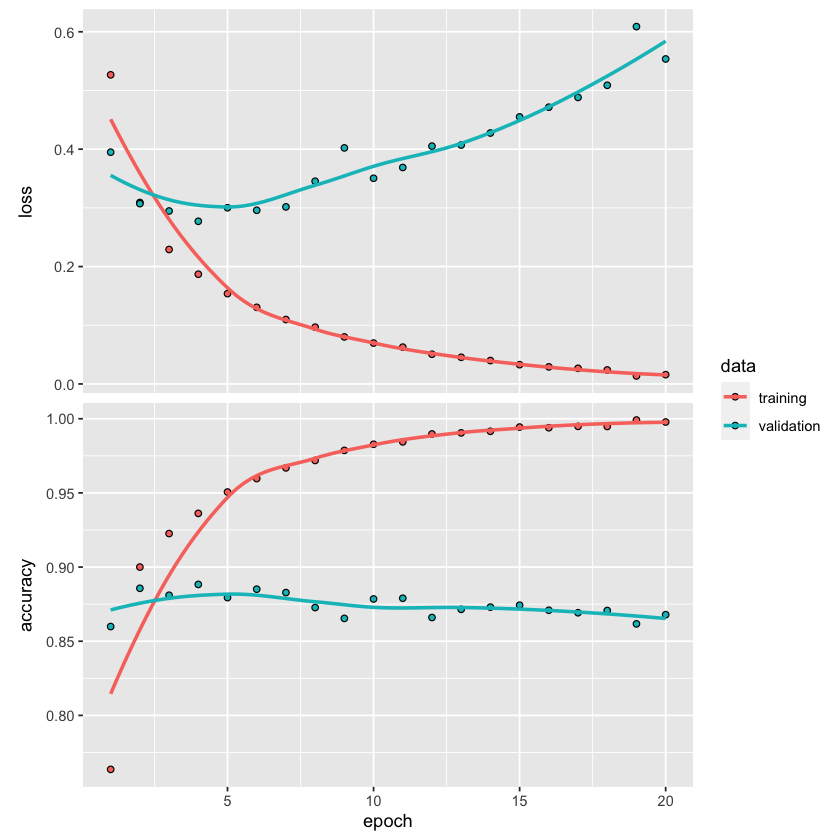

In [9]:
# Display the structure of "history"
str(history)

# Ploat the metrics
plot(history)

In [10]:
# Build the model
model <- keras_model_sequential() %>%
    layer_dense(units = 16, activation = "relu") %>%
    layer_dense(units = 16, activation = "relu") %>%
    layer_dense(units = 1, activation = "sigmoid")

# Compile the model
model %>% compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

# Train the model
model %>% fit(
    x_train,
    y_train,
    epochs = 4,
    batch_size = 512
)

In [11]:
# Generate the metrics for the test set
metrics <- model %>% evaluate(x_test, y_test)

# Display the contents of "metrics"
metrics

# Generate probability predictions
predictions_probs <- model %>% predict(x_test)

# Convert probabilities to classes based on 0.5 cutoff
predictions_classes <- ifelse(predictions_probs < 0.5, 0, 1)

# Load caret
library(caret)

# Create a confusion matrix and further stats using "confusionMatrix()"; needs "factors" as inputs
confusionMatrix(data = factor(predictions_classes), reference = factor(y_test), positive = "1")

loss  accuracy 
0.2847832 0.8864400

Loading required package: ggplot2

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11155  1494
         1  1345 11006
                                          
               Accuracy : 0.8864          
                 95% CI : (0.8824, 0.8903)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7729          
                                          
 Mcnemar's Test P-Value : 0.005475        
                                          
            Sensitivity : 0.8805          
            Specificity : 0.8924          
         Pos Pred Value : 0.8911          
         Neg Pred Value : 0.8819          
             Prevalence : 0.5000          
         Detection Rate : 0.4402          
   Detection Prevalence : 0.4940          
      Balanced Accuracy : 0.8864          
                                          
       'Positive' Class : 1               
                  

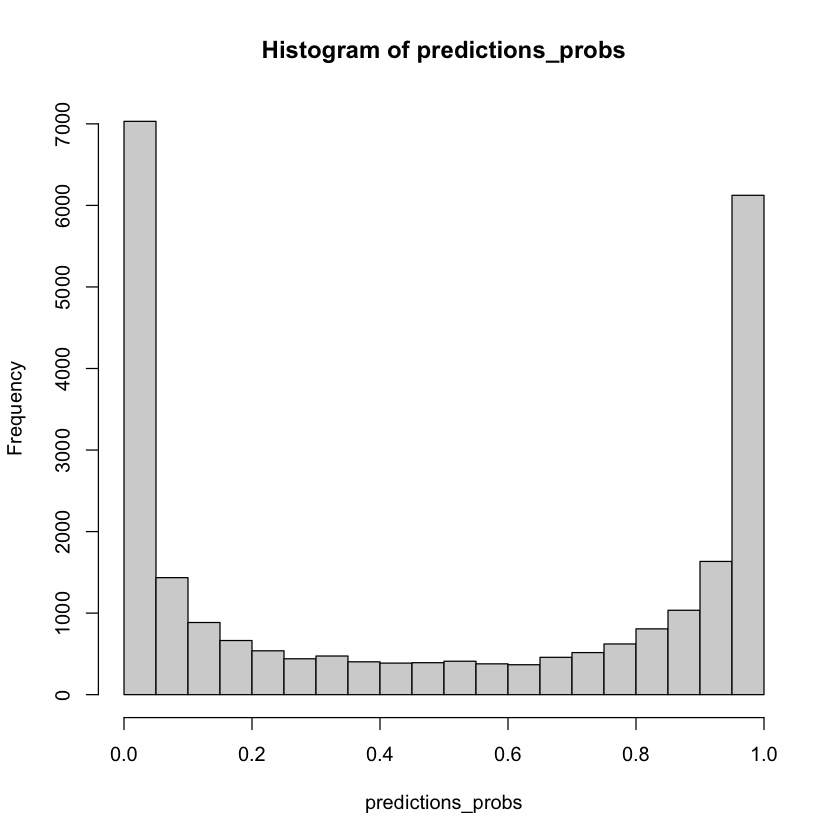

In [12]:
# Generate a histogram of the probabilities
hist(predictions_probs)

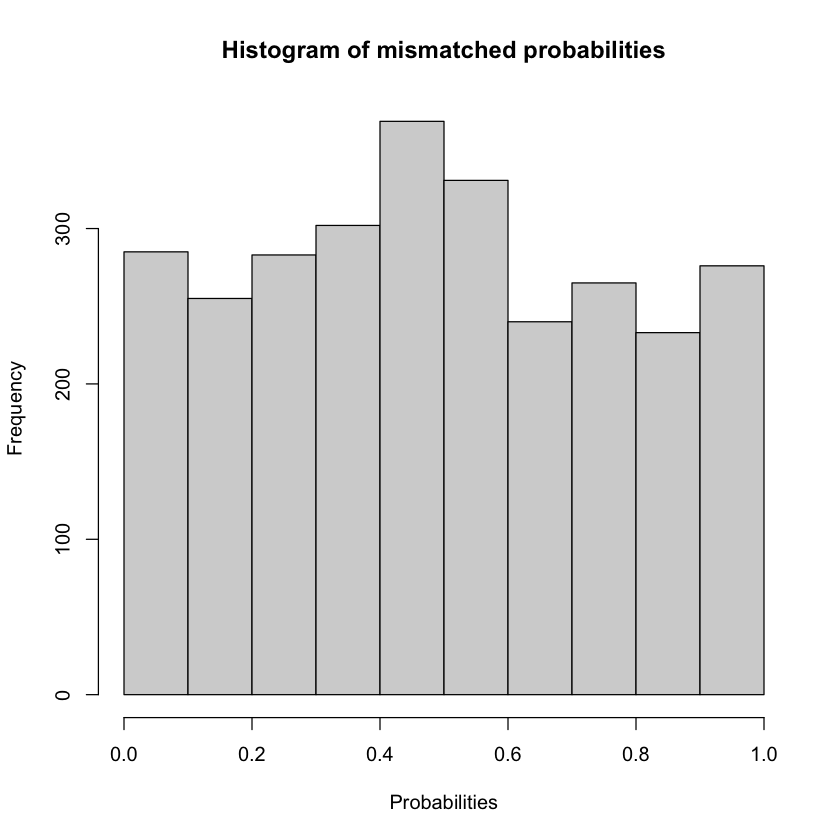

In [13]:
# Histogram of those probabilities for which prediction != actual value
hist(predictions_probs[predictions_classes != y_test], xlab = "Probabilities", main = "Histogram of mismatched probabilities")